In [3]:
%cd "/Users/arasvalizadeh/Desktop/ML-HW2/"

/Users/arasvalizadeh/Desktop/ML-HW2


In [4]:
from src.preprocess_churn import preprocess_churn_data
from src.config import SPOTIFY_DATA_PATH, TEST_SIZE, RANDOM_STATE


In [5]:
# Run preprocessing pipeline
X_train, X_test, y_train, y_test, scaler, feature_names = preprocess_churn_data(
    data_path=SPOTIFY_DATA_PATH,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)


Loading data...
Original data shape: (8000, 12)

Numerical columns: ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week', 'offline_listening']
Categorical columns: ['gender', 'country', 'subscription_type', 'device_type']

1. Handling missing values...
   Missing values before: 93, after: 0

2. Handling outliers...
   Outliers capped using IQR method

3. One-hot encoding categorical features...
   Shape after encoding: (8000, 24)
   New feature names: ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week', 'offline_listening', 'gender_Female', 'gender_Male', 'gender_Other', 'country_AU', 'country_CA', 'country_DE', 'country_FR', 'country_IN', 'country_PK', 'country_UK', 'country_US', 'subscription_type_Family', 'subscription_type_Free', 'subscription_type_Premium', 'subscription_type_Student', 'device_type_Desktop', 'device_type_Mobile', 'device_type_Web']

4. Splitting data into train and test sets...
   Train set: (640

In [6]:
print("=" * 60)
print("Training Set Summary")
print("=" * 60)
print(f"\nSamples: {X_train.shape[0]}")
print(f"Features: {X_train.shape[1]}")
print(f"Churned users: {y_train.sum()} ({y_train.sum()/len(y_train)*100:.2f}%)")
print(f"Non-churned users: {(y_train==0).sum()} ({(y_train==0).sum()/len(y_train)*100:.2f}%)")


Training Set Summary

Samples: 6400
Features: 24
Churned users: 1657 (25.89%)
Non-churned users: 4743 (74.11%)


In [7]:
print("=" * 60)
print("Test Set Summary")
print("=" * 60)
print(f"\nSamples: {X_test.shape[0]}")
print(f"Features: {X_test.shape[1]}")
print(f"Churned users: {y_test.sum()} ({y_test.sum()/len(y_test)*100:.2f}%)")
print(f"Non-churned users: {(y_test==0).sum()} ({(y_test==0).sum()/len(y_test)*100:.2f}%)")


Test Set Summary

Samples: 1600
Features: 24
Churned users: 414 (25.87%)
Non-churned users: 1186 (74.12%)


In [8]:
print(f"Total features: {len(feature_names)}\n")
print("Feature names:")
for i, name in enumerate(feature_names, 1):
    print(f"  {i}. {name}")


Total features: 24

Feature names:
  1. age
  2. listening_time
  3. songs_played_per_day
  4. skip_rate
  5. ads_listened_per_week
  6. offline_listening
  7. gender_Female
  8. gender_Male
  9. gender_Other
  10. country_AU
  11. country_CA
  12. country_DE
  13. country_FR
  14. country_IN
  15. country_PK
  16. country_UK
  17. country_US
  18. subscription_type_Family
  19. subscription_type_Free
  20. subscription_type_Premium
  21. subscription_type_Student
  22. device_type_Desktop
  23. device_type_Mobile
  24. device_type_Web


In [9]:
import pandas as pd

# Convert to DataFrame for better visualization
X_train_df = pd.DataFrame(X_train, columns=feature_names)
print("First 5 rows of training data:")
X_train_df.head()


First 5 rows of training data:


,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,gender_Female,gender_Male,gender_Other,country_AU,...,country_PK,country_UK,country_US,subscription_type_Family,subscription_type_Free,subscription_type_Premium,subscription_type_Student,device_type_Desktop,device_type_Mobile,device_type_Web
4661,0.811039,-0.186908,-0.422118,1.668555,-0.573394,0.582162,False,False,True,False,...,False,False,True,False,False,False,True,True,False,False
5195,0.495900,-0.902295,-0.492582,-0.807644,-0.573394,0.582162,False,True,False,False,...,False,False,True,False,False,True,False,False,False,True
7123,-0.685870,-0.759217,0.881466,1.265453,1.821236,-1.717736,False,True,False,False,...,True,False,False,False,True,False,False,False,False,True
3764,1.441317,-0.461140,-0.316422,-0.577300,-0.573394,0.582162,False,True,False,False,...,True,False,False,False,False,False,True,False,True,False
6824,-0.449516,-0.580371,-1.161989,-0.750058,-0.573394,0.582162,False,False,True,False,...,False,True,False,True,False,False,False,False,False,True


In [10]:
print("Training data info:")
print(f"Shape: {X_train_df.shape}")
print(f"\nData types:")
print(X_train_df.dtypes.value_counts())
print(f"\nBasic statistics:")
X_train_df.describe()


Training data info:
Shape: (6400, 24)

Data types:
bool       18
float64     6
Name: count, dtype: int64

Basic statistics:


,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening
count,6.400000e+03,6.400000e+03,6.400000e+03,6.400000e+03,6.400000e+03,6.400000e+03
mean,1.681988e-16,-7.771561e-17,1.776357e-17,-9.436896e-17,1.110223e-17,1.232348e-16
std,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00
min,-1.710071e+00,-1.713067e+00,-1.725701e+00,-1.729021e+00,-5.733941e-01,-1.717736e+00
25%,-8.434393e-01,-8.665255e-01,-8.801335e-01,-8.652302e-01,-5.733941e-01,-1.717736e+00
50%,2.319224e-02,-8.061144e-03,6.661047e-04,-1.439651e-03,-5.733941e-01,5.821616e-01
75%,8.898238e-01,8.623263e-01,8.814658e-01,8.623509e-01,3.844578e-01,5.821616e-01
max,1.677671e+00,1.732714e+00,1.727033e+00,1.726141e+00,1.821236e+00,5.821616e-01


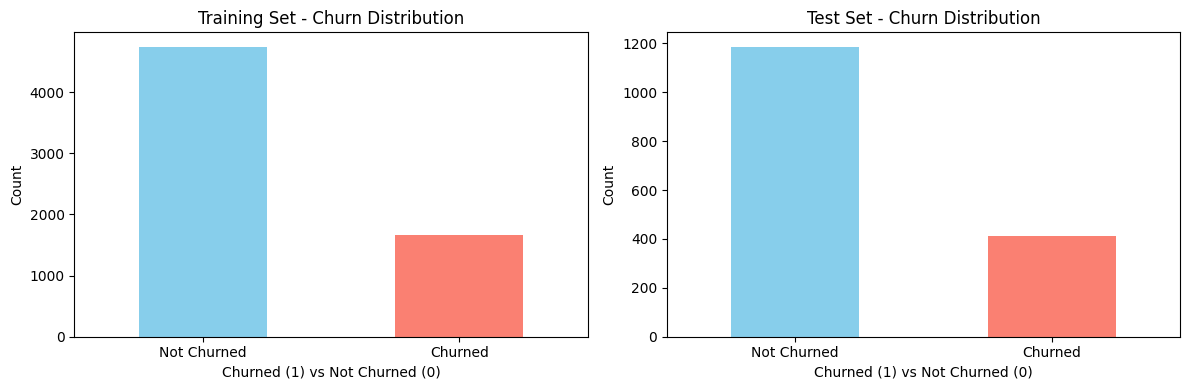


Preprocessing completed successfully!


In [11]:
import matplotlib.pyplot as plt

# Plot target variable distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Training set
y_train.value_counts().plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
ax1.set_title('Training Set - Churn Distribution')
ax1.set_xlabel('Churned (1) vs Not Churned (0)')
ax1.set_ylabel('Count')
ax1.set_xticklabels(['Not Churned', 'Churned'], rotation=0)

# Test set
y_test.value_counts().plot(kind='bar', ax=ax2, color=['skyblue', 'salmon'])
ax2.set_title('Test Set - Churn Distribution')
ax2.set_xlabel('Churned (1) vs Not Churned (0)')
ax2.set_ylabel('Count')
ax2.set_xticklabels(['Not Churned', 'Churned'], rotation=0)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("Preprocessing completed successfully!")
print("=" * 60)


In [12]:
from models.logitstic_regression import LogisticRegressionCustom
import numpy as np

X_train_np = X_train_df.values
X_test_np = pd.DataFrame(X_test, columns=feature_names).values  

y_train_np = np.array(y_train)
y_test_np =np.array(y_test)

In [13]:
from collections import Counter
counter = Counter(y_train_np)
w0 = len(y_train_np) / (2.0 * counter[0])
w1 = len(y_train_np) / (2.0 * counter[1])
class_weights = (w0, w1)
print(f"Class weights: {class_weights}")

Class weights: (0.6746784735399536, 1.9312009656004827)


In [14]:
X_train_np = X_train_np.astype(float)
X_test_np = X_test_np.astype(float)
y_train_np = y_train_np.astype(int)
y_test_np = y_test_np.astype(int)
logisticModel = LogisticRegressionCustom(lr=0.1, epochs=2000, class_weights=class_weights)
logisticModel.fit(X_train_np, y_train_np)

y_pred = logisticModel.predict(X_test_np)

epoch 0, loss=0.6931
epoch 200, loss=0.6913
epoch 400, loss=0.6911
epoch 600, loss=0.6910
epoch 800, loss=0.6910
epoch 1000, loss=0.6910
epoch 1200, loss=0.6909
epoch 1400, loss=0.6909
epoch 1600, loss=0.6909
epoch 1800, loss=0.6909


In [15]:
acc2 = logisticModel.accuracy(X_train_np,y_train_np)
acc = logisticModel.accuracy(X_test_np, y_test_np)
print(f"Test Accuracy: {acc:.4f}")
print(f"Train Accuracy: {acc2:.4f}")
conf_mat = logisticModel.confusion_matrix(X_test_np, y_test_np)
print("Confusion Matrix:\n", conf_mat)

Test Accuracy: 0.5244
Train Accuracy: 0.5353
Confusion Matrix:
 [[638 548]
 [213 201]]


In [16]:
!pip install imblearn

In [17]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, confusion_matrix

# Oversample only the training set
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train_np, y_train_np)

print("Before Oversampling:", np.bincount(y_train_np))
print("After Oversampling:", np.bincount(y_train_balanced))

Before Oversampling: [4743 1657]
After Oversampling: [4743 4743]


In [18]:
logistic_balanced = LogisticRegressionCustom(
    lr=0.1, epochs=2000, class_weights=(1, 1)
)

logistic_balanced.fit(X_train_balanced, y_train_balanced)

y_pred_test_bal = logistic_balanced.predict(X_test_np)

print("Balanced Logistic Regression Test Accuracy:",
      accuracy_score(y_test_np, y_pred_test_bal))
print("Confusion Matrix:\n",
      confusion_matrix(y_test_np, y_pred_test_bal))

epoch 0, loss=0.6931
epoch 200, loss=0.6902
epoch 400, loss=0.6900
epoch 600, loss=0.6900
epoch 800, loss=0.6899
epoch 1000, loss=0.6899
epoch 1200, loss=0.6899
epoch 1400, loss=0.6899
epoch 1600, loss=0.6899
epoch 1800, loss=0.6899
Balanced Logistic Regression Test Accuracy: 0.51375
Confusion Matrix:
 [[624 562]
 [216 198]]


In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

# Example dataset
df = pd.read_csv("/Users/arasvalizadeh/Desktop/ML-HW2/data/spotify_data.csv")

numeric_features = ["age", "listening_time","songs_played_per_day","skip_rate","ads_listened_per_week","offline_listening"]
categorical_features = ["gender", "country","subscription_type","device_type"]

X = df[numeric_features + categorical_features]
y = df["is_churned"]

numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore")),
])

preprocess = ColumnTransformer([
    ("num", numeric_pipeline, numeric_features),
    ("cat", categorical_pipeline, categorical_features),
])

model = Pipeline([
    ("preprocess", preprocess),
    ("clf", LogisticRegression(max_iter=1000)),
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

print("Train Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))

y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)


Train Score: 0.73890625
Test Score: 0.75
Confusion Matrix:
 [[1200    0]
 [ 400    0]]
